<a href="https://colab.research.google.com/github/kylo-dev/gachon-machinelearning/blob/main/7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 심층 신경망

In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

### 2개의 층

In [2]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [4]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

**은닉층**

* 입력층과 출력층 사이에 있는 모든 층
* 출력층에서는 소프트맥스나 시그모이드 함수를 써야 함

**왜 은닉층에 활성화 함수를 적용하는가?**
* 활성화 함수없이 은닉층만 있다면 의미가 없음
* 활성화 함수는 각 뉴런의 출력을 결정하며, 이를 통해 네트워크는 비선형성을 학습할 수 있게 됩니다.

    예를 들어, 렐루(ReLU), 시그모이드(sigmoid), 하이퍼볼릭 탄젠트(tanh) 등의 활성화 함수는 각각 입력값에 대해 비선형 변환을 수행하여 네트워크가 복잡한 패턴을 학습할 수 있도록 돕습니다.

## 심층 신경망 만들기

In [5]:
model = keras.Sequential([dense1, dense2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 층을 추가하는 다른 방법

In [6]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

In [7]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5710 - accuracy: 0.8064
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4132 - accuracy: 0.8509
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3776 - accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3530 - accuracy: 0.8732
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3344 - accuracy: 0.8782


## 렐루 활성화 함수

* 입력이 0보다 작을 때는 0을 출력하고, 0보다 큰 경우에는 입력값을 그대로 반환합니다.

수식으로 표현하면 다음과 같습니다:

f(x)=max(0,x)

f(x)는 해당 뉴런의 출력값을 나타냅니다.

---

ReLU 함수는 여러 이유로 인해 선호됩니다:

* 비선형성(Non-linearity): ReLU는 비선형 함수로, 신경망의 층을 여러 개 겹쳐도 전체적으로는 비선형성을 유지합니다.

* 계산 효율성(Computational Efficiency): 다른 활성화 함수에 비해 계산이 간단하며, 이는 네트워크의 학습 및 예측 과정을 빠르게 만들어줍니다.

* 기울기 소실 문제 해결: Sigmoid나 tanh와 같은 활성화 함수에서 발생하는 기울기 소실 문제를 완화할 수 있습니다.

In [11]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [14]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5290 - accuracy: 0.8114
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3929 - accuracy: 0.8565
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3545 - accuracy: 0.8717
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3319 - accuracy: 0.8812
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3139 - accuracy: 0.8859


In [15]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3776 - accuracy: 0.8721


[0.3776129186153412, 0.872083306312561]

## 옵티마이저

딥러닝 학습시 최대한 틀리지 않는 방향으로 학습해야 한다,

얼마나 틀리는지(loss)를 알게 하는 함수가 **loss function(손실함수)**이다.
loss function 의 최솟값을 찾는 것을 학습 목표로 한다.

최소값을 찾아가는 것 최적화 = **Optimization**

이를 수행하는 알고리즘이 최적화 알고리즘 = **Optimizer** 이다.


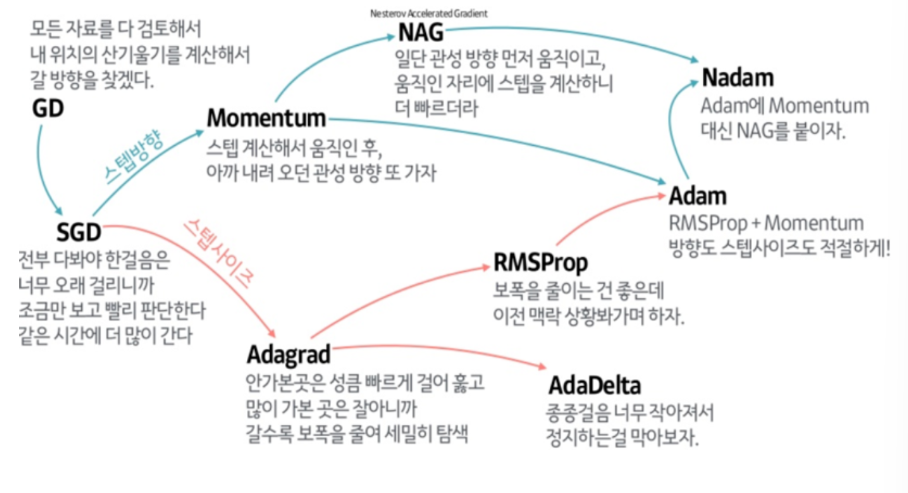


In [16]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [18]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

**momentum**

새로운 가중치와 절편을 계산할 때, 과거의 가중치와 절편의 변화량을 어느 정도 반영할 것인지

In [19]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [20]:
adagrad = keras.optimizers.Adagrad()

model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [22]:
rmsprop = keras.optimizers.RMSprop()

model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [23]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5262 - accuracy: 0.8154
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3940 - accuracy: 0.8589
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3546 - accuracy: 0.8702
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3284 - accuracy: 0.8794
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3058 - accuracy: 0.8872


In [26]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3509 - accuracy: 0.8751


[0.3508652448654175, 0.875083327293396]

In [28]:
adam = keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.8, beta_2=0.9)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics="accuracy")
model.fit(train_scaled, train_target, epochs=5)

model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5513 - accuracy: 0.8116
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4069 - accuracy: 0.8564
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3709 - accuracy: 0.8664
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3456 - accuracy: 0.8771
Epoch 5/5
375/375 [==============================] - 1s 1ms/step - loss: 0.3555 - accuracy: 0.8741


[0.35550859570503235, 0.8740833401679993]